# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Load-Processed-Dataset" data-toc-modified-id="Load-Processed-Dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load Processed Dataset</a></div><div class="lev1 toc-item"><a href="#Word2Vec" data-toc-modified-id="Word2Vec-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Word2Vec</a></div><div class="lev2 toc-item"><a href="#Model" data-toc-modified-id="Model-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Model</a></div><div class="lev2 toc-item"><a href="#TNSE-Clustering" data-toc-modified-id="TNSE-Clustering-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>TNSE Clustering</a></div><div class="lev1 toc-item"><a href="#Sense2Vec" data-toc-modified-id="Sense2Vec-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Sense2Vec</a></div><div class="lev2 toc-item"><a href="#POS-Tagging" data-toc-modified-id="POS-Tagging-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>POS Tagging</a></div><div class="lev2 toc-item"><a href="#Model" data-toc-modified-id="Model-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Model</a></div><div class="lev2 toc-item"><a href="#Plotting-Function" data-toc-modified-id="Plotting-Function-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Plotting Function</a></div><div class="lev1 toc-item"><a href="#Full-Dataset" data-toc-modified-id="Full-Dataset-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Full Dataset</a></div><div class="lev2 toc-item"><a href="#Search-Function" data-toc-modified-id="Search-Function-41"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Search Function</a></div><div class="lev2 toc-item"><a href="#TSNE" data-toc-modified-id="TSNE-42"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>TSNE</a></div><div class="lev2 toc-item"><a href="#Plotting-Function" data-toc-modified-id="Plotting-Function-43"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Plotting Function</a></div><div class="lev2 toc-item"><a href="#Plots" data-toc-modified-id="Plots-44"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Plots</a></div><div class="lev2 toc-item"><a href="#Polarity" data-toc-modified-id="Polarity-45"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Polarity</a></div><div class="lev2 toc-item"><a href="#Polarity-Plots" data-toc-modified-id="Polarity-Plots-46"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Polarity Plots</a></div>

# Load Processed Dataset

In [38]:
import pandas as pd

#Pickle store/load function

def storePickle(df=None,name="temp.pkl"):
    df.to_pickle(name)
    
def loadPickle(name="temp.pkl"):
    df=pd.read_pickle(name)
    return df

In [ ]:
fname="processedDataset_2.6_0.2.pkl"
dataset=loadPickle(fname)

In [3]:
dataset.head(10)

,asin,reviewText,reviewerID,overall,reviewTextProcessed
37005005,B009ISQ3DI,"What an eye-opening, inspiring, mind-changing ...",A2NUPUVD4STVX1,5.0,"[what, an, eye, opening, inspiring, mind, chan..."
36441314,B000BTBUPY,"If you are a fan of Alien Ant Farm, you must g...",A2MXYN7GYRWXQL,5.0,"[if, you, are, fan, of, alien, ant, farm, you,..."
27972577,B000009RBB,Movie was not as exciting as expected. Kevin ...,A296Z116T97V24,2.0,"[movie, was, not, as, exciting, as, expected, ..."
57550936,B00004WG6I,"When Doctor Who started, the idea was to mix a...",A3KRZJ426FBYOD,5.0,"[when, doctor, who, started, the, idea, was, t..."
25958743,B000MQC9H4,Especially during the holidays! But wonderful ...,A25XNNF3HCFNW9,5.0,"[especially, during, the, holidays, but, wonde..."
79622651,B0060MYMFQ,This show is a non stop laugh. I love all the ...,ARQ5XSGABMLYS,5.0,"[this, show, is, non, stop, laugh, love, all, ..."
57375286,0790729393,"Outstanding cast, great plot line, great direc...",A3KHTCG0WN4C5X,5.0,"[outstanding, cast, great, plot, line, great, ..."
26144407,B0009YX9SM,"The film's story is simple and silly, acting i...",A268V84KJH3W39,1.0,"[the, film, story, is, simple, and, silly, act..."
24993929,6302036097,As Elvis Presley would have been76 in January ...,A24CZDFEN7ZOHP,5.0,"[as, elvis, presley, would, have, been76, in, ..."
78599191,B002TVQ4GW,Haven't seen a movie this good in a while. Lov...,AQ30U16XZPQNP,5.0,"[haven, seen, movie, this, good, in, while, lo..."


Here we load the processed dataset stored at the end of previous Notebook.

# Word2Vec

## Model

In [ ]:
import gensim
%time model = gensim.models.Word2Vec(list(dataset['reviewTextProcessed']), min_count=10, size=600, workers=20)

Creating the word2vec model fitting the processed reviews from the datatset.

In [8]:
print (model.most_similar(['awesome','bad'],negative=['fun']))

[('terrible', 0.6763127446174622), ('horrible', 0.6721887588500977), ('awful', 0.6578158140182495), ('lousy', 0.6208399534225464), ('awsome', 0.6108125448226929), ('horrid', 0.5852782726287842), ('atrocious', 0.5811731219291687), ('poor', 0.5507168769836426), ('crappy', 0.5349428653717041), ('amazing', 0.5320942401885986)]


Here we find the most similar words in our corpus, based on the query.

## TNSE Clustering

In [40]:
from sklearn.manifold import TSNE
vocab = list(model.wv.vocab)
X = model[vocab]

In [ ]:
tsne = TSNE(n_components=100,random_state=0)
X_tsne = tsne.fit_transform(X)

Here we fit our clustering model with the vectors produced by the gensim library.

In [41]:
df = pd.concat([pd.DataFrame(X_tsne),
                pd.Series(vocab)],
               axis=1)

df.columns = ['x', 'y', 'word']
df.head(10)

,x,y,word
0,0.356973,0.152999,finally
1,0.218858,1.560307,movie
2,-1.091823,-0.789357,with
3,-1.329360,0.392014,substance
4,1.817532,-1.132573,inspired
5,0.774655,-0.759587,by
6,-0.469210,-1.405123,true
7,1.627455,-0.421974,events
8,-0.780746,-0.710607,and
9,-1.668560,0.889395,inspirational


In [48]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
%matplotlib inline

def plotWord2Vec(df=None, anno= 0, title="Chart"):
    
    # Plot
    fig = plt.figure(figsize=(25,15))
    ax = fig.add_subplot(111)
    ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
    
    for idx,row in df.iterrows():
        ax.scatter(row['x'], row['y'])
            
    ax.legend()
    if(anno==1):
        for i, txt in df.iterrows():
            ax.annotate(txt['word'], (txt['x'],txt['y']), size=8)
            
    plt.title(title)
    plt.show()
    plt.show()

/home/vivek/anaconda3/envs/vivenv/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


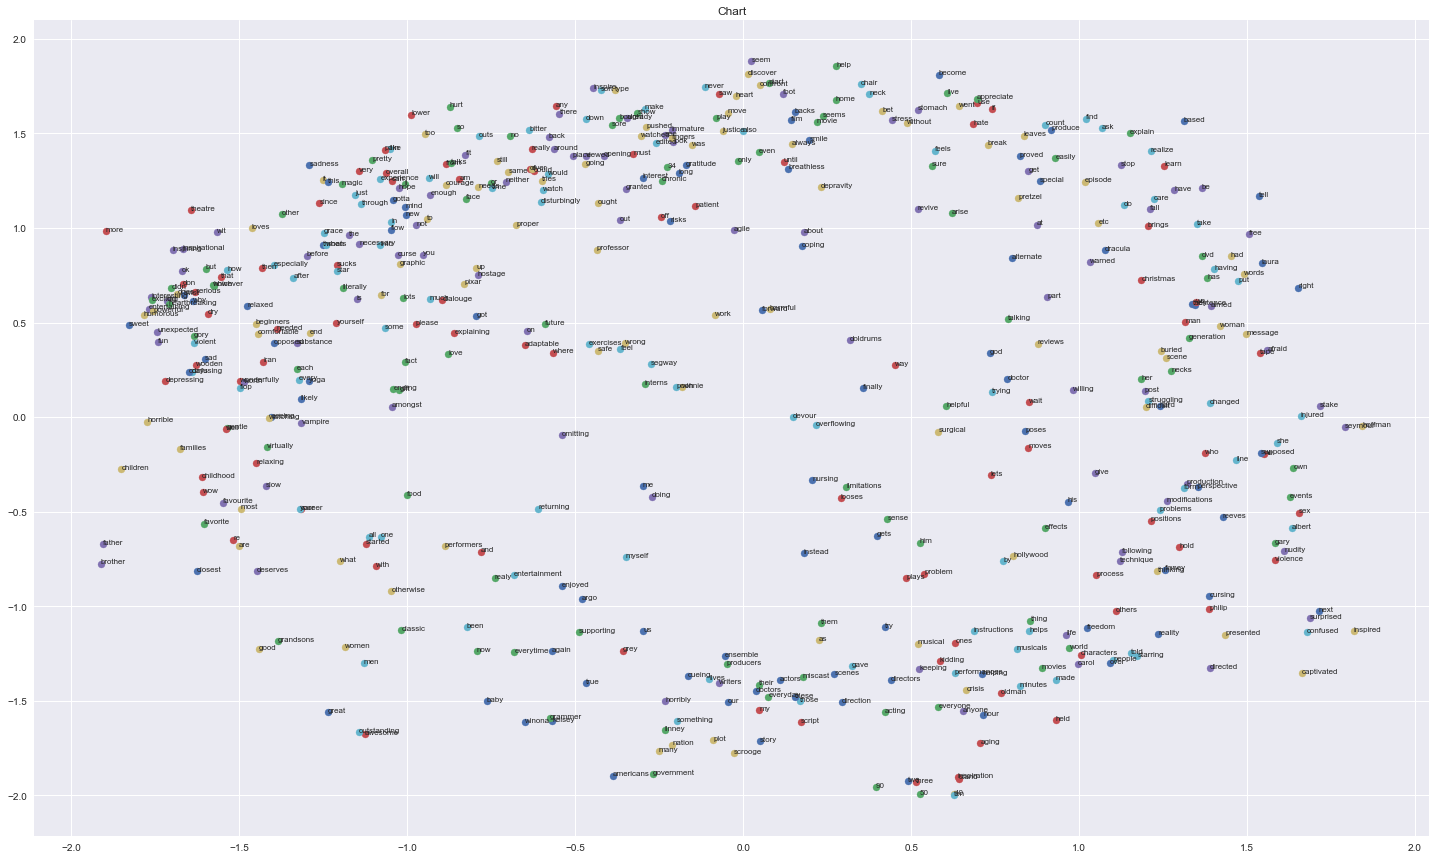

In [51]:
plotWord2Vec(df.head(500),anno=1)

The cluster formed are visualized here with 2 dimensions of embedded space.

In [36]:
import numpy as np

#Storing model
#model.save('word2vec_model')
#np.save('X_tsne.npy', X_tsne)

#Loading model
model = gensim.models.Word2Vec.load('word2vec_model')
X_tsne = np.load('X_tsne.npy')

We can store the word2vec model and fitted cluster model to our disk, for future.

# Sense2Vec

## POS Tagging

In [5]:
import nltk

def pos_tag(reviews):
        tagList=[]
        pos = [nltk.pos_tag(review) for review in reviews]
        tags=(pos[0])
        
        pos = [[(word+"|"+postag) for (word, postag) in review] for review in pos]
        return pos,tagList

In [6]:
posTagged=pos_tag(reviews=list(dataset['reviewTextProcessed'].head(100)))
posTagged

([['finally|RB|NN',
   'movie|NN|NN',
   'with|IN|NN',
   'substance|NN|NN',
   'inspired|VBN|NN',
   'by|IN|NN',
   'true|JJ|NN',
   'events|NNS|NN',
   'and|CC|NN',
   'inspirational|JJ|NN',
   'it|PRP|NN',
   'gave|VBD|NN',
   'me|PRP|NN',
   'sense|NN|NN',
   'of|IN|NN',
   'the|DT|NN',
   'good|JJ|NN',
   'in|IN|NN',
   'americans|NNS|NN',
   'and|CC|NN',
   'the|DT|NN',
   'fact|NN|NN',
   'that|IN|NN',
   'there|EX|NN',
   'are|VBP|NN',
   'good|JJ|NN',
   'people|NNS|NN',
   'in|IN|NN',
   'our|PRP$|NN',
   'government|NN|NN',
   'who|WP|NN',
   'are|VBP|NN',
   'willing|JJ|NN',
   'to|TO|NN',
   'take|VB|NN',
   'risks|NNS|NN',
   'to|TO|NN',
   'help|VB|NN',
   'others|NNS|NN',
   'and|CC|NN',
   'have|VBP|NN',
   'the|DT|NN',
   'courage|NN|NN',
   'to|TO|NN',
   'do|VB|NN',
   'the|DT|NN',
   'right|JJ|NN',
   'thing|NN|NN',
   'gave|VBD|NN',
   'me|PRP|NN',
   'inspiration|NN|NN',
   'and|CC|NN',
   'hope|VB|NN',
   'what|WP|NN',
   'made|VBD|NN',
   'this|DT|NN',
   'movi

In [8]:
len(dataset)

2320130

Here we ran a process to fetch POS tags of all the word tokens present in the reviews. Having such semantic information about the words, would help us extract the contextual information or sentiment polarity of the review.
<br/>As seen above, the column "reviewTextProcessed" stores all the processed words with its POS tags.

In [ ]:
storePickle(dataset,name="taggedDataset.pkl")
print("Stored!")

The tagged reviews are stored here in our disk, for future use.

## Model

In [26]:
dataset=loadPickle("extractedDataset.pkl")
print(dataset.head(1))
print("Size: ",len(dataset))

         asin                                         reviewText  \
7  B00125OS3C  Beautiful photos/film with wonderful music.  G...   

              reviewerID  overall  
7  A00001362Q1PGIX2FYSSH      5.0  
Size:  4640261


In [27]:
dataset.head(1)

,asin,reviewText,reviewerID,overall
7,B00125OS3C,Beautiful photos/film with wonderful music. G...,A00001362Q1PGIX2FYSSH,5.0


In [10]:
import gensim
%time model = gensim.models.Word2Vec(list(dataset['reviewTextProcessed']), min_count=10, size=600, workers=20)

CPU times: user 188 ms, sys: 16 ms, total: 204 ms
Wall time: 110 ms


In [35]:
print (model.most_similar(['war|NN','movie|NN']))

[('film|NN', 0.6309832334518433), ('ww2|NN', 0.5286853313446045), ('wwii|NN', 0.5217652320861816), ('war.i|NN', 0.5178101062774658), ('movies|NNS', 0.5173385739326477), ('war.the|NNP', 0.4902089536190033), ('story|NN', 0.4505111873149872), ('ww2|NNP', 0.4499706029891968), ('ww|NN', 0.4490077495574951), ('spr|NN', 0.4444739818572998)]


In [20]:
from sklearn.manifold import TSNE
vocab = list(model.wv.vocab)
X = model[vocab]
tsne = TSNE(n_components=2,random_state=0,perplexity=50.0)
X_tsne = tsne.fit_transform(X)

In [8]:
df = pd.concat([pd.DataFrame(X_tsne),
                pd.Series(vocab)],
               axis=1)

df.columns = ['x', 'y', 'word']
df.head(10)
foo = lambda x: pd.Series(x.split('|'))
rev = df['word'].apply(foo)
rev.rename(columns={0:'word',1:'tag'},inplace=True)
rev = rev[['tag']]
df['tag']=rev
df.head(5)

,x,y,word,tag
0,0.042425,0.002608,finally|RB,RB
1,-0.032237,0.198921,movie|NN,NN
2,0.682172,-0.010009,with|IN,IN
3,-0.011780,0.083803,substance|NN,NN
4,-0.081009,0.027041,inspired|VBN,VBN


## Plotting Function

In [16]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
%matplotlib inline

def plotSense2Vec(df=None, anno= 0, title="Chart"):


    groups = df.groupby('tag')

    colors=["#e6194b","#3cb44b","#ffe119","#0082c8","#f58231","#911eb4","#46f0f0","#f032e6",
            "#d2f53c","#fabebe","#008080","#e6beff","#aa6e28","#fffac8","#800000",
            "#aaffc3","#808000","#ffd8b1","#000080","#808080","#FFFFFF","#000000"]

    #define the colormap
    cmap = plt.cm.tab20

    # Plot
    fig = plt.figure(figsize=(25,15))
    ax = fig.add_subplot(111)
    ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
    for name, group in groups:
        ax.scatter(group.x, group.y,label=name)
    ax.legend()
    if(anno==1):
        for i, txt in df.iterrows():
            ax.annotate(txt['word'], (txt['x'],txt['y']), size=8)
    plt.title(title)
    plt.show()

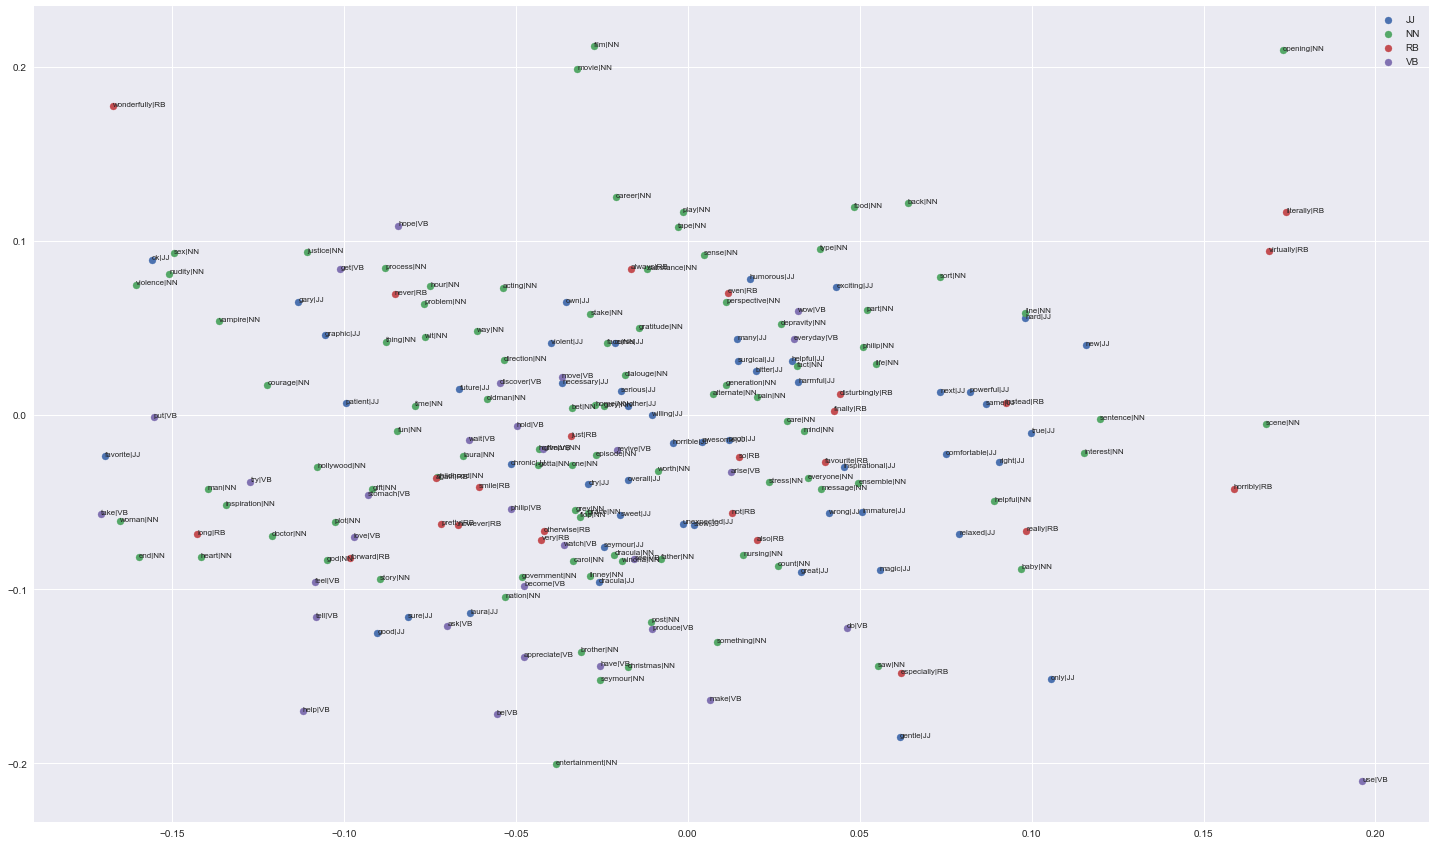

In [40]:
#tags=['NN','JJ']
tags=['NN','JJ','VB','RB']
#words=['good|JJ','bad|JJ','right|JJ','wrong|JJ','true|JJ','false|JJ']

df_Temp=df[df['tag'].isin(tags)]
#df_Temp=df[df['word'].isin(words)]

df_Temp=df_Temp.head(200)

plotSense2Vec(df_Temp,anno=1)

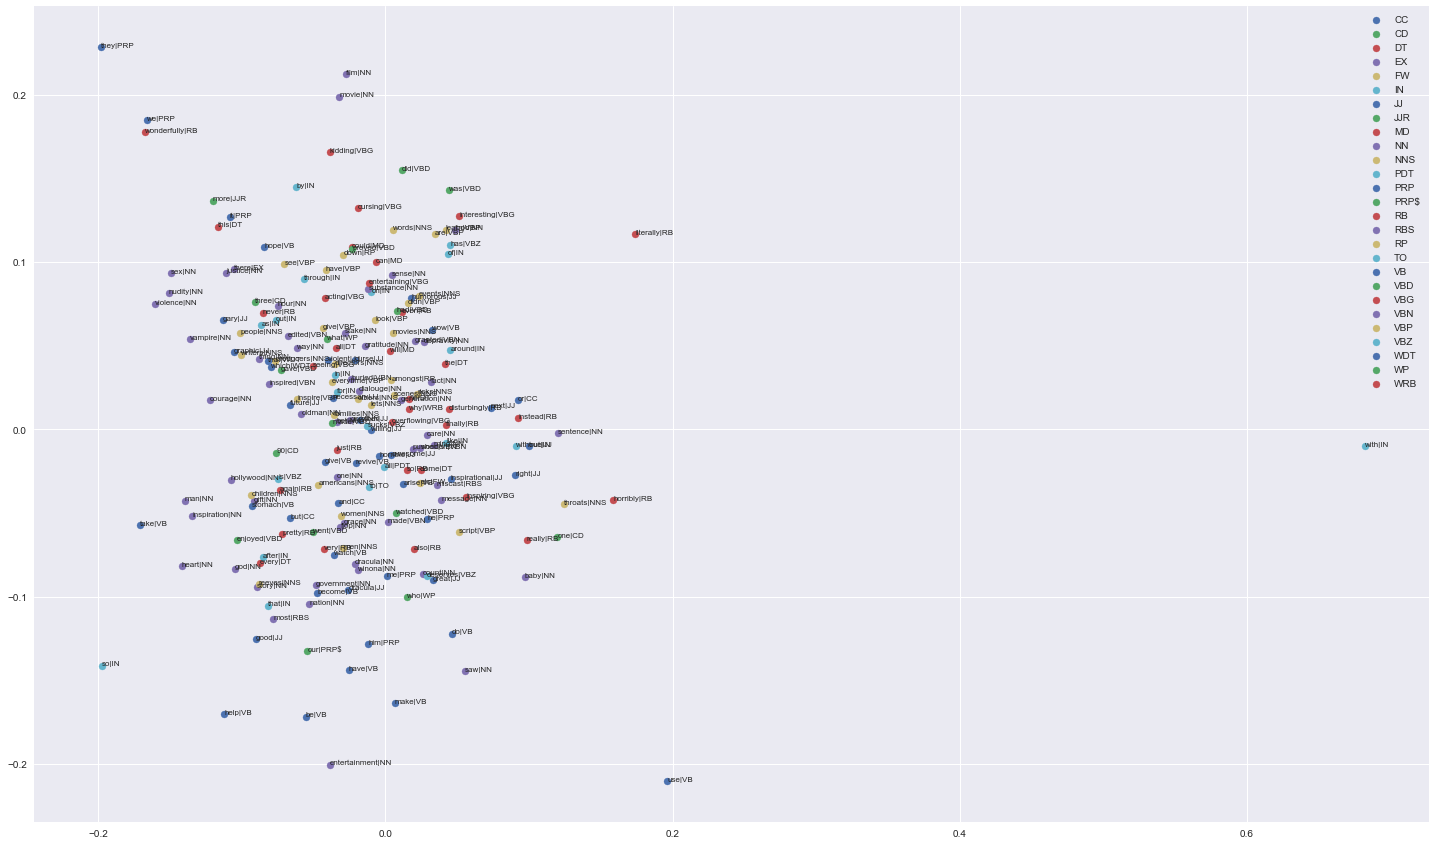

In [38]:
df_Temp=df.head(200)
plotSense2Vec(df_Temp,anno=1)

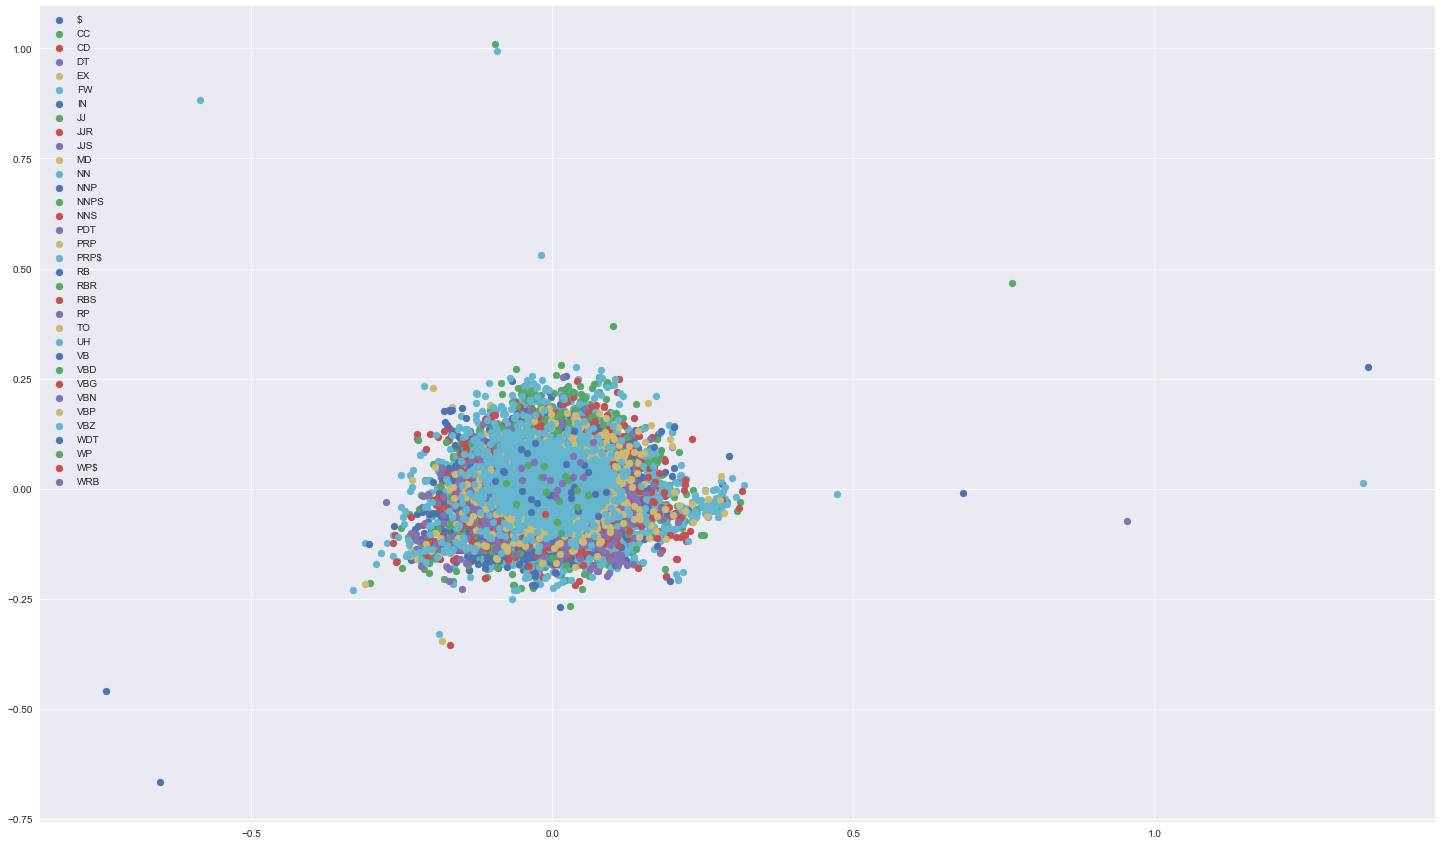

In [34]:
df_Temp=df
plotSense2Vec(df_Temp)

# Full Dataset

In [ ]:
import pandas as pd
import pickle
import re
import nltk
import numpy as np
import gensim
from sklearn.manifold import TSNE
import time
import spacy
import spacy
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from nltk.corpus import stopwords
import string

print('nltk stopwords:', stopwords.words('english'))
SYMBOLS = " ".join(string.punctuation).split(" ") + ["-----", "---", "...", "“", "”", "'ve"]
STOPLIST = set(stopwords.words('english') + ["n't", "'s", "'m", "ca"] + list(ENGLISH_STOP_WORDS) + SYMBOLS)

print('stoplist:', STOPLIST)
nlp = spacy.load('en', parser=False, entity=False)


#Pickle store/load function

def storePickle(df=None,name="temp.pkl"):
    df.to_pickle(name)

def loadPickle(name="temp.pkl"):
    df=pd.read_pickle(name)
    return df

def preprocess(text):
    # tokenize and remove anything else than unicode character
    words = re.findall(r'\w+', text,flags = re.UNICODE)
    lowerwords=[x.lower() for x in words if len(x) > 1] #converting words into lowercase
    return lowerwords

#Function to process the dataset
def dataProcess(df=None):
    df['reviewTextProcessed']=""
    for index, row in df.iterrows():
        row=preprocess(row['reviewText'])
        df.set_value(index,'reviewTextProcessed',row)
    return df

def pos_tag(reviews):
    pos = [["{}|{}".format(word,postag) for (word, postag) in nltk.pos_tag(review)] for review in review
s]
    return pos

class MyIterator(object):
    def __init__(self, df=None):
        self.df = df

    def _gen_reviews(self):
        for index, row in self.df.iterrows():
            yield [ "{}|{}".format(word.text, word.tag_) for word in nlp(row['reviewText'].lower()) if word.text not in STOPLIST and len(word.text) > 1]

    def __iter__(self):
        start = time.time()
        print('iter starting')
        for pos in self._gen_reviews():
            yield pos
        print('iter ending', time.time() - start)
        return

def main():
#Load Dataset
    print('loading pickle dataset')
    fname="extractedDataset.pkl"
     dataset=loadPickle(fname)

    print('dataset size', len(dataset))

    print('creating model')

#Creating Word2Vec model
    my_iter = MyIterator(df=dataset)
    data = [v for v in my_iter]
    model = gensim.models.Word2Vec(data, min_count=10, size=600, workers=4)
    print('done')

#Saving Model
    model.save('word2vec_model')
    print('saved')
if __name__ == '__main__':
    main()

## Search Function

In [ ]:
    
def search(tlist=[],term=["beautiful|JJ"],tag="NN"):
    for review in tlist:
        if (term in review):
            for word in review:
                if (word[0].split('|')[1]==tag):
                    yield word[0]
    yield term[0]

In [27]:
#Search for a word
wordList =  list(search(taggedList,term=["movie|NN"],tag="JJ"))

In [31]:
wordList[:10]

['fan|NN',
 'blueray|NN',
 'dvd|NN',
 'box|NN',
 'magic|NN',
 'lafayette|NN',
 'season|NN',
 'entertainment|NN',
 'collection|NN',
 'keaton|NN']

In [60]:
#Count and sort top freq words
import collections

counts = collections.Counter(wordList)
wordList = sorted(wordList, key=lambda x: -counts[x])

In [61]:
#Insert the base/central word
wordList.insert(0,"movie|NN")

In [ ]:
#Sample out top n unique words from the list

words=[]
n=500
for idx, word in enumerate(wordList):
    if(len(words)>n):
        break
    if(word not in words):
        try:
            model[word]
            words.append(word)
        except:
            continue
#Remove the quot word if it exists , ignore the error when it does not exist
#words.remove("quot|JJ")

## TSNE

In [63]:
from sklearn.manifold import TSNE
X = model[words]
tsne = TSNE(n_components=2,random_state=0,perplexity=50.0)
X_tsne = tsne.fit_transform(X)

## Plotting Function

In [21]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
%matplotlib inline

def plotVec(df=None, anno= 0, title="Chart", isPol=False):

    groups = df.groupby('tag')

    colors=["#e6194b","#3cb44b","#ffe119","#0082c8","#f58231","#911eb4","#46f0f0","#f032e6",
            "#d2f53c","#fabebe","#008080","#e6beff","#aa6e28","#fffac8","#800000",
            "#aaffc3","#808000","#ffd8b1","#000080","#808080","#FFFFFF","#000000"]

    #define the colormap
    cmap = plt.cm.tab20

    # Plot
    fig = plt.figure(figsize=(25,15))
    ax = fig.add_subplot(111)
    ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
    for name, group in groups:
        if(isPol):
            for idx,row in group.iterrows():
                if(row['polarity']>0):
                    ax.scatter(row['x'], row['y'], alpha=row["polarity"], color='green')
                elif(row['polarity']<0):
                    ax.scatter(row['x'], row['y'], alpha=abs(row["polarity"]), color='red')
                elif(row['word']=="war|NN"):
                    ax.scatter(row['x'], row['y'], alpha=1, color='blue')
        else:
            ax.scatter(group.x, group.y,label=name)
            
    ax.legend()
    if(anno==1):
        for i, txt in df.iterrows():
            if(isPol and (txt['polarity']>0 or txt['polarity']<0)):
                ax.annotate(txt['word'], (txt['x'],txt['y']), size=8)
            elif(isPol==False):
                ax.annotate(txt['word'], (txt['x'],txt['y']), size=8)
    plt.title(title)
    plt.show()

#enter image description here

    plt.show()

In [64]:
from textblob import TextBlob                                                                                                               
def word_polarity(wordList=[]):                                                                                                                       
    pol=[]
    for idx, word in wordList.iteritems():
        #print(word)
        try:                                                                                                                                    
            w = TextBlob(word)                
            pol.append(w.sentiment.polarity)                                                                                                     
        except:                                                                                                                                 
            pol.append(0)
    return pol

In [65]:
import pandas as pd

df = pd.concat([pd.DataFrame(X_tsne),
                pd.Series(words)],
               axis=1)

df.columns = ['x', 'y', 'word']
foo = lambda x: pd.Series(x.split('|'))
rev = df['word'].apply(foo)
rev.rename(columns={0:'word',1:'tag'},inplace=True)
pol=word_polarity(rev['word'])
rev = rev[['tag']]
df['tag']=rev
df['polarity']=pol
df.head(10)

,x,y,word,tag,polarity
0,-41.055722,3.558300,movie|NN,NN,0.000000
1,-35.845171,24.642604,good|JJ,JJ,0.700000
2,-39.696525,22.179801,great|JJ,JJ,0.800000
3,7.234464,23.002872,little|JJ,JJ,-0.187500
4,-28.111664,28.530151,bad|JJ,JJ,-0.700000
5,-4.990301,18.622589,old|JJ,JJ,0.100000
6,-8.758605,-7.358019,new|JJ,JJ,0.136364
7,-31.907440,9.545364,real|JJ,JJ,0.200000
8,-22.865996,-9.149053,original|JJ,JJ,0.375000
9,-28.413030,20.121864,funny|JJ,JJ,0.250000


## Plots

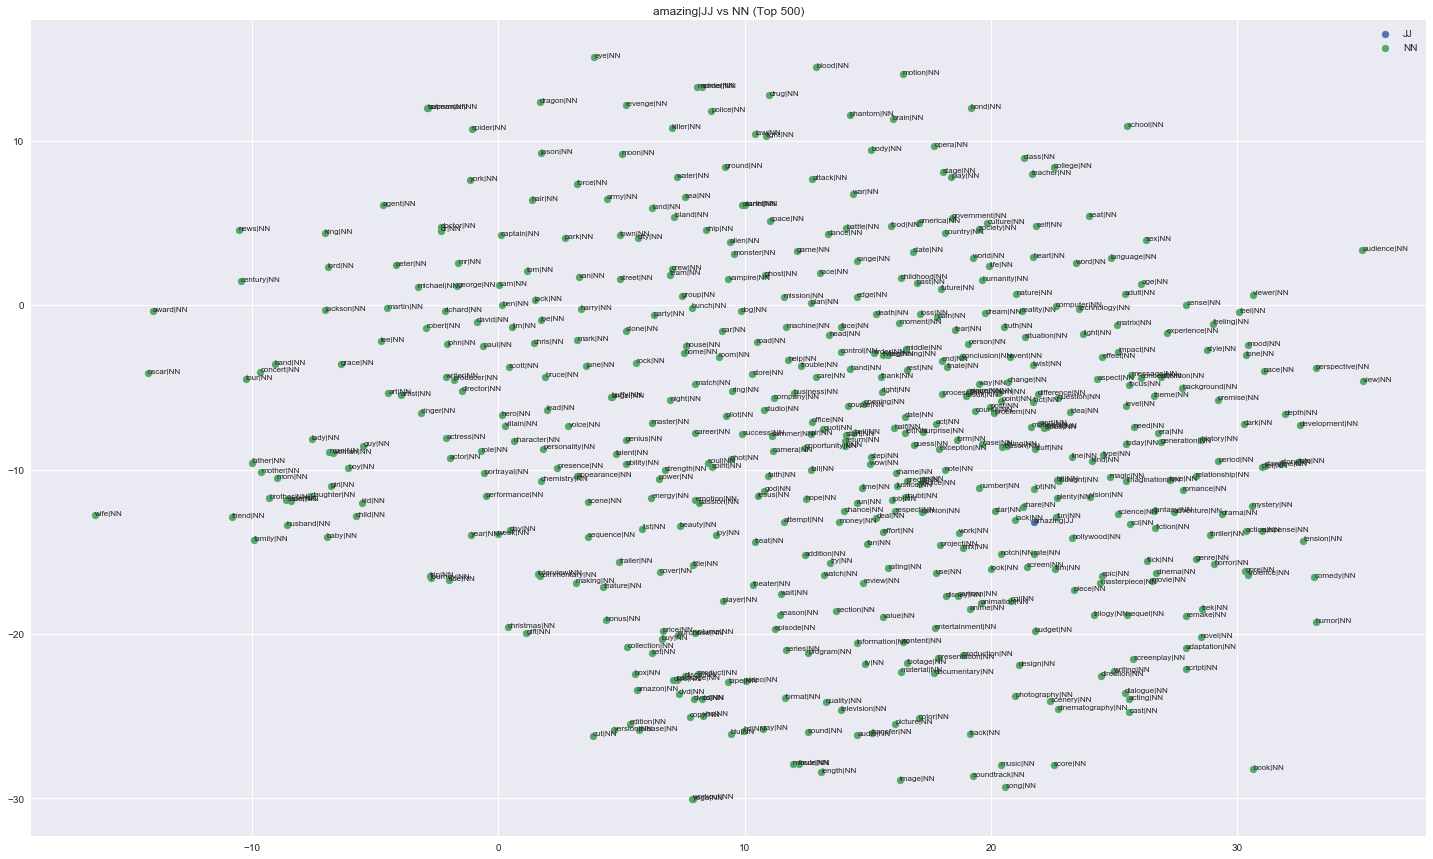

In [220]:
plotVec(df,anno=1,title="amazing|JJ vs NN (Top 500)")

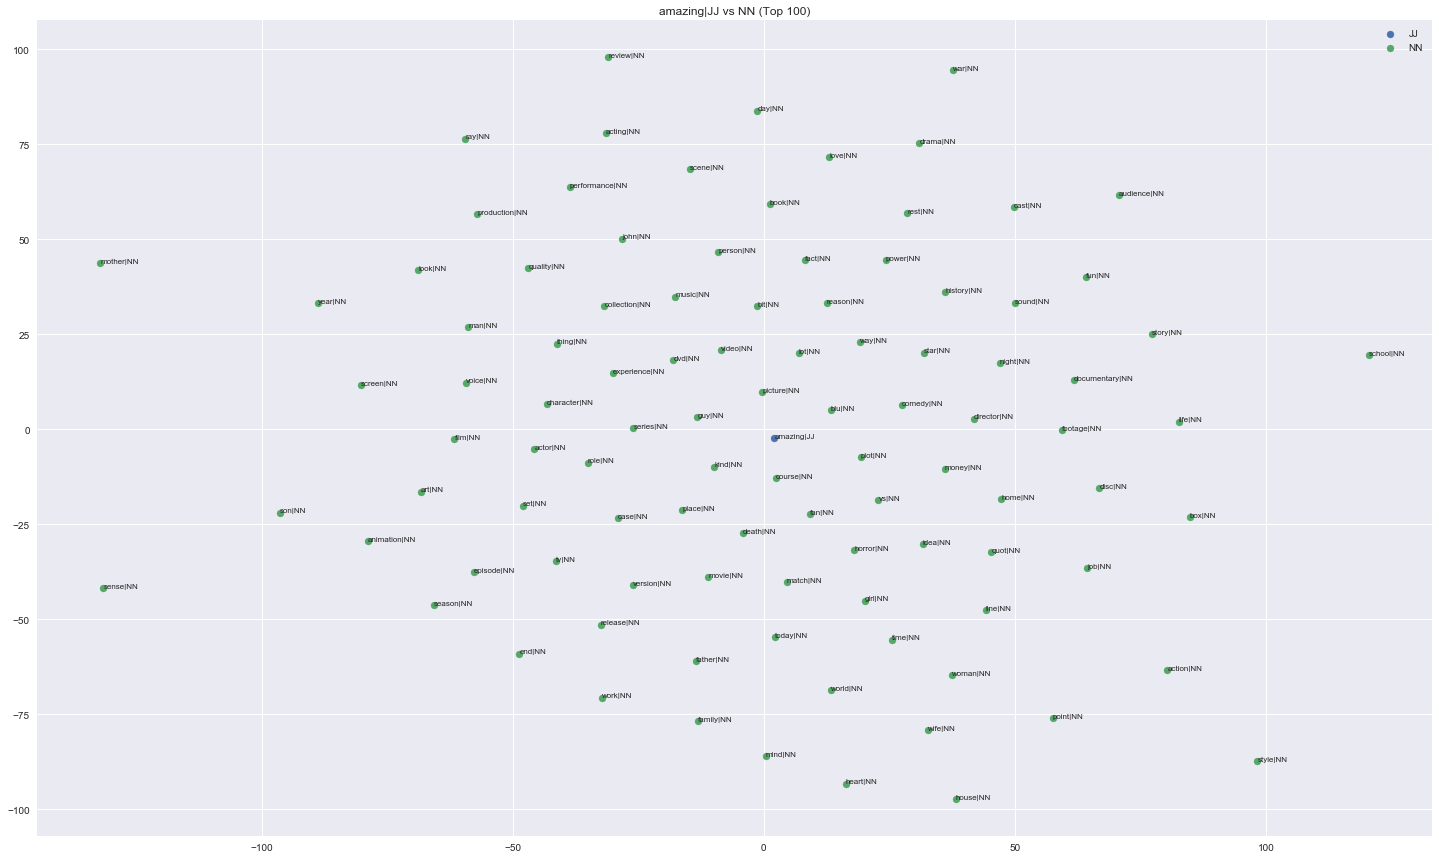

In [129]:
plotVec(df,anno=1,title="amazing|JJ vs NN (Top 100)")

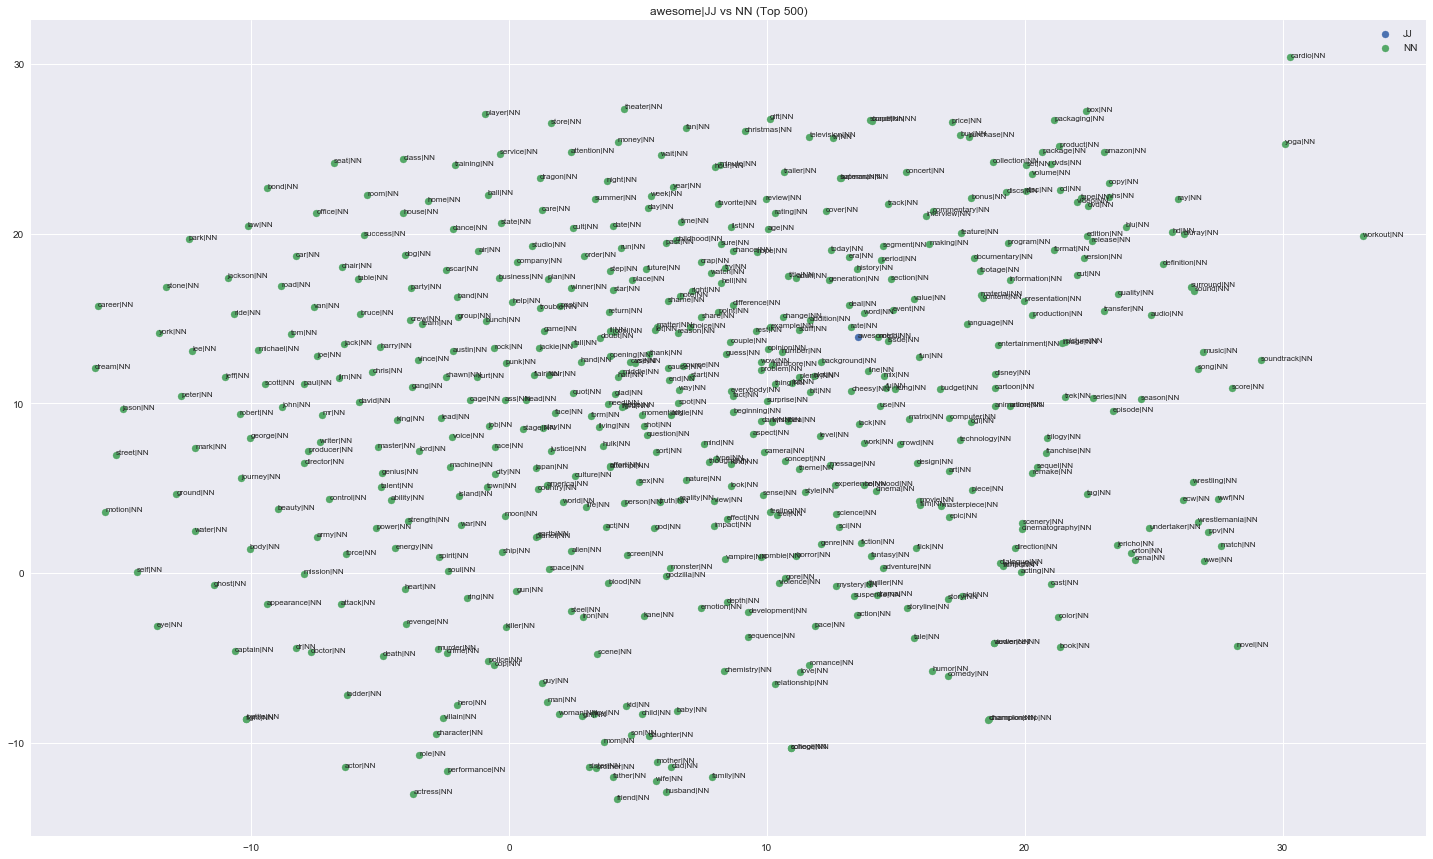

In [213]:
plotVec(df,anno=1,title="awesome|JJ vs NN (Top 500)")

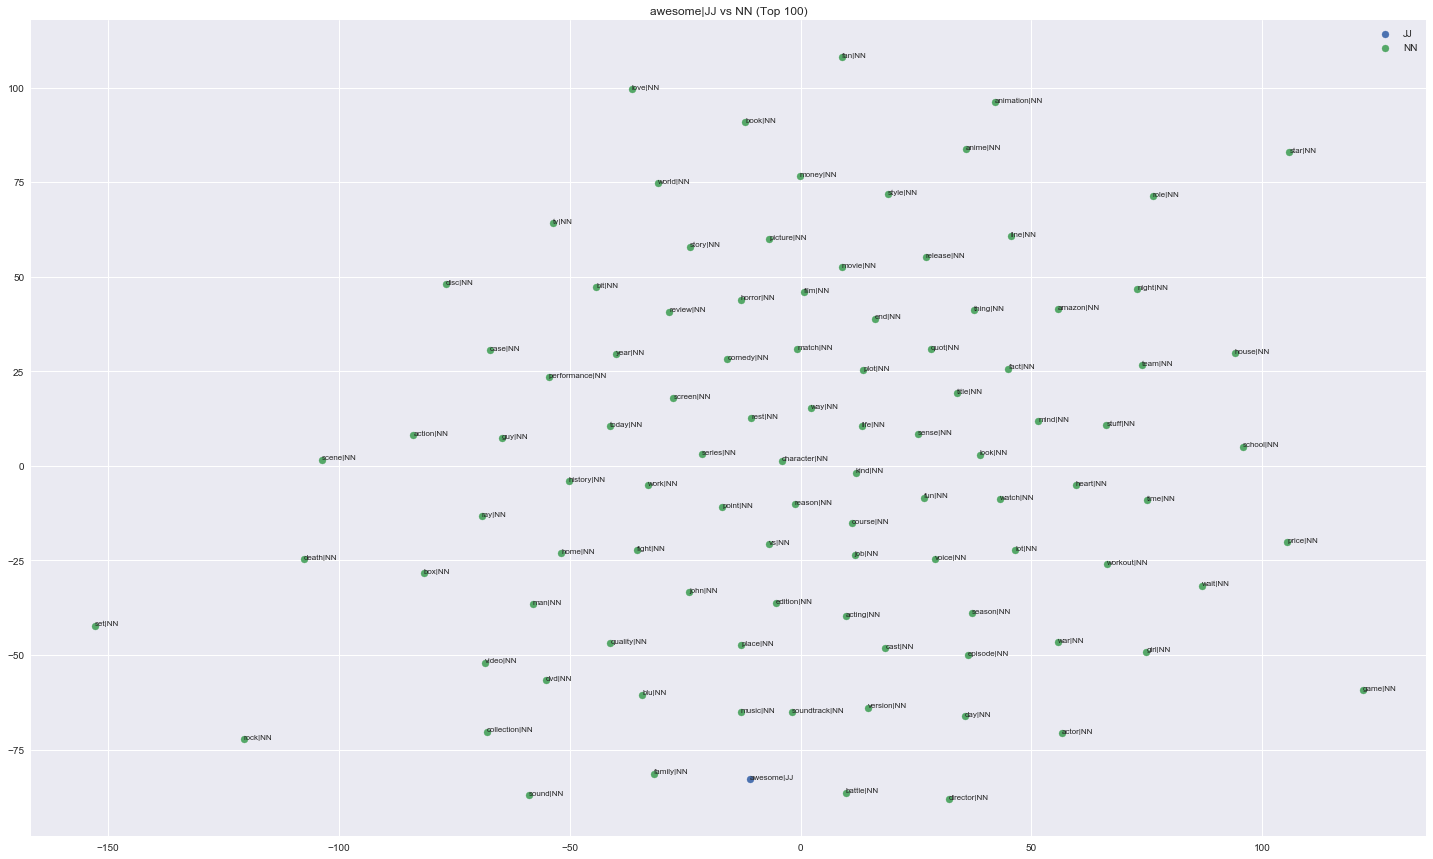

In [137]:
plotVec(df,anno=1,title="awesome|JJ vs NN (Top 100)")

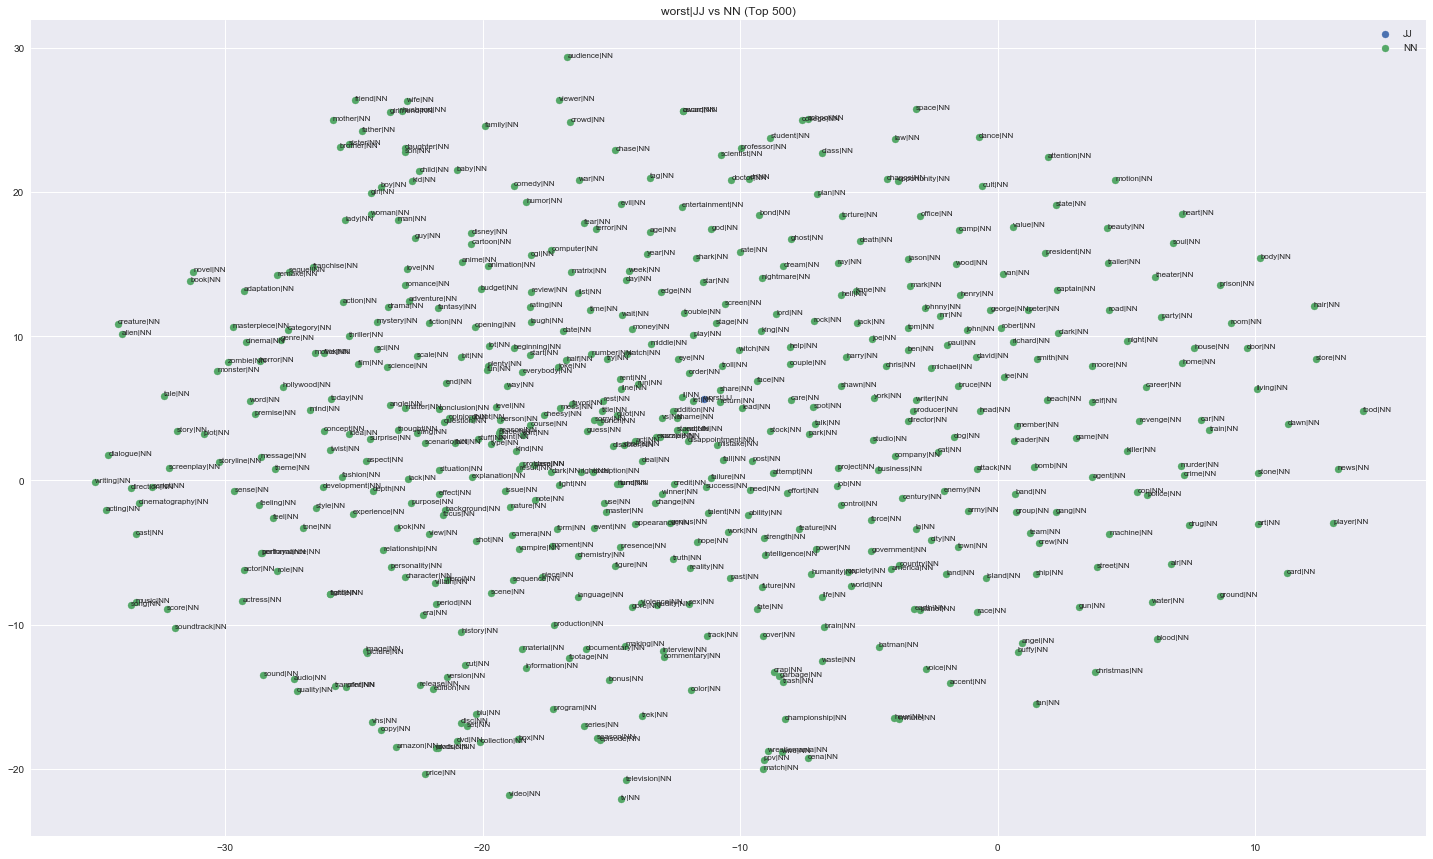

In [230]:
plotVec(df,anno=1,title="worst|JJ vs NN (Top 500)")

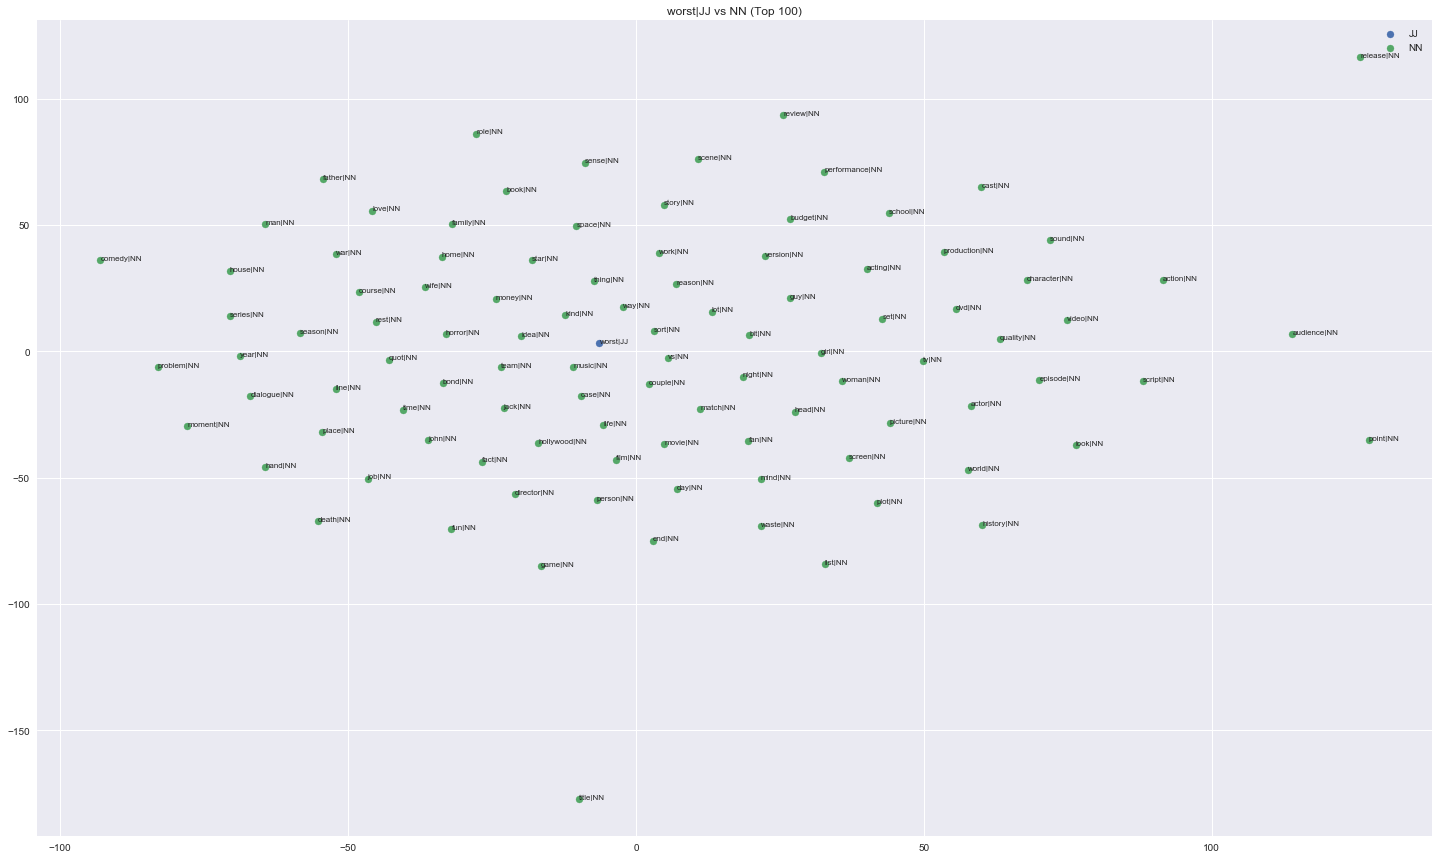

In [144]:
plotVec(df,anno=1,title="worst|JJ vs NN (Top 100)")

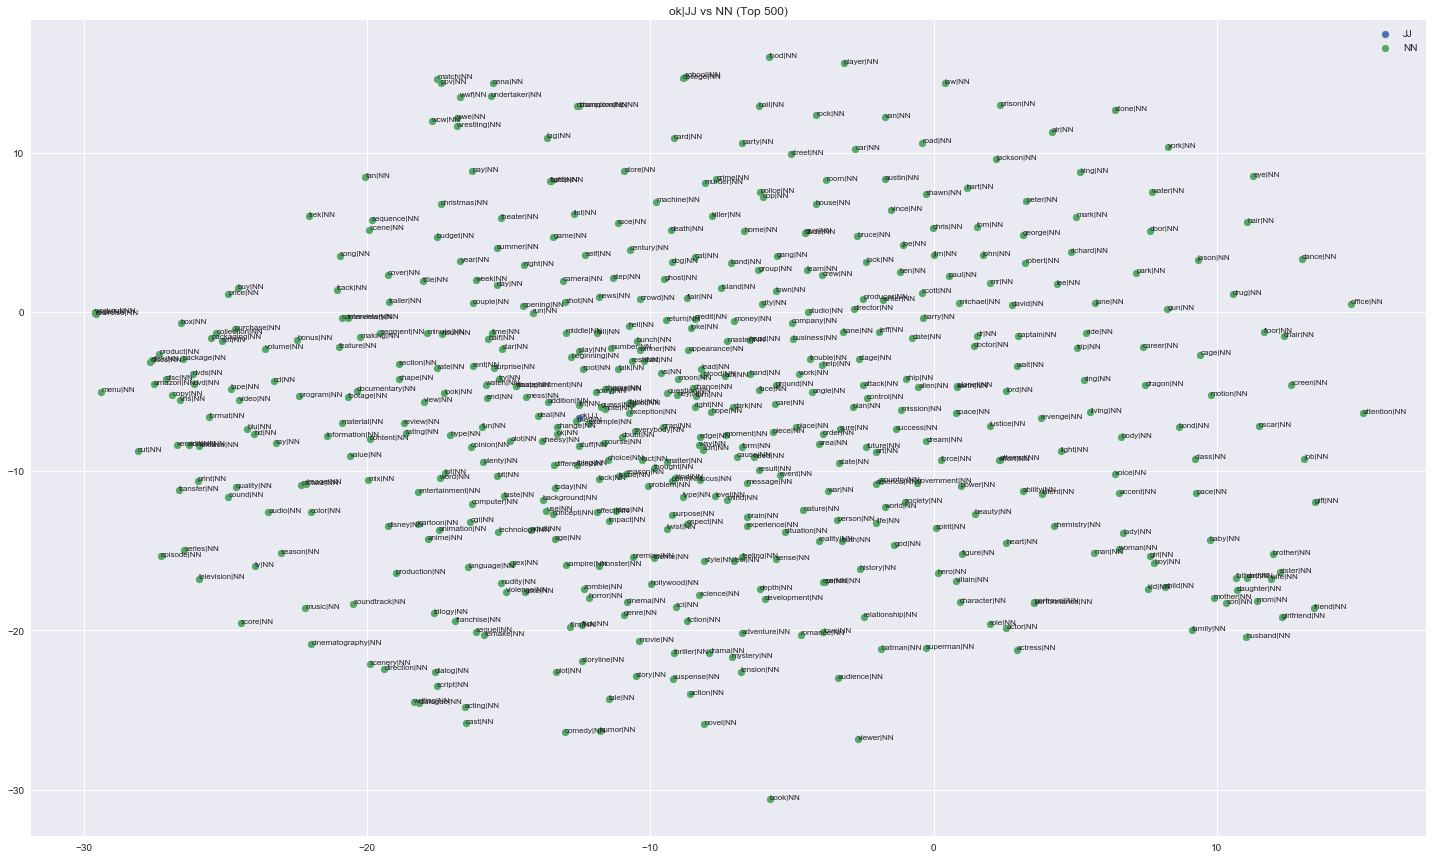

In [239]:
plotVec(df,anno=1,title="ok|JJ vs NN (Top 500)")

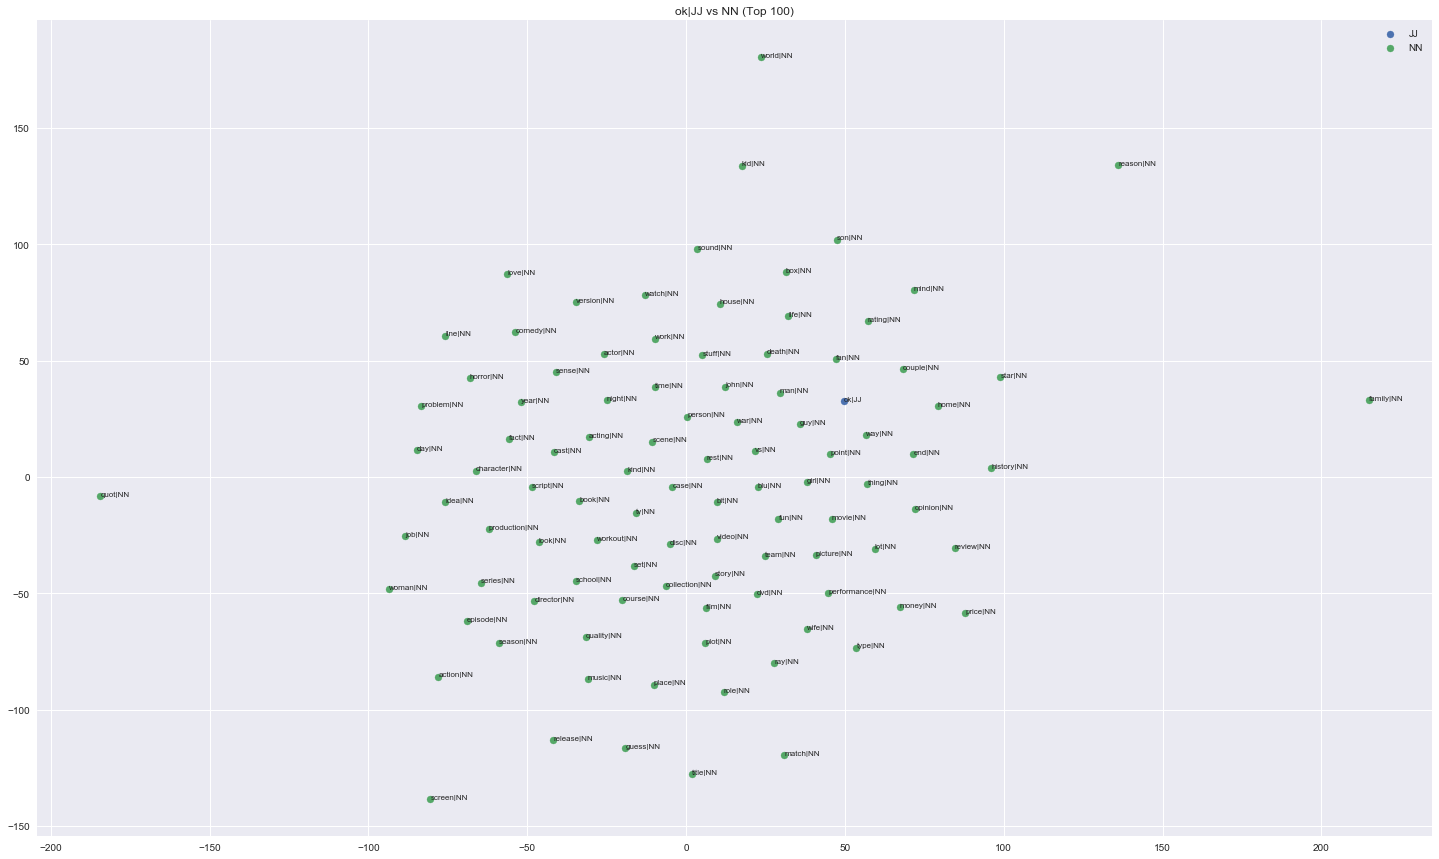

In [151]:
plotVec(df,anno=1,title="ok|JJ vs NN (Top 100)")

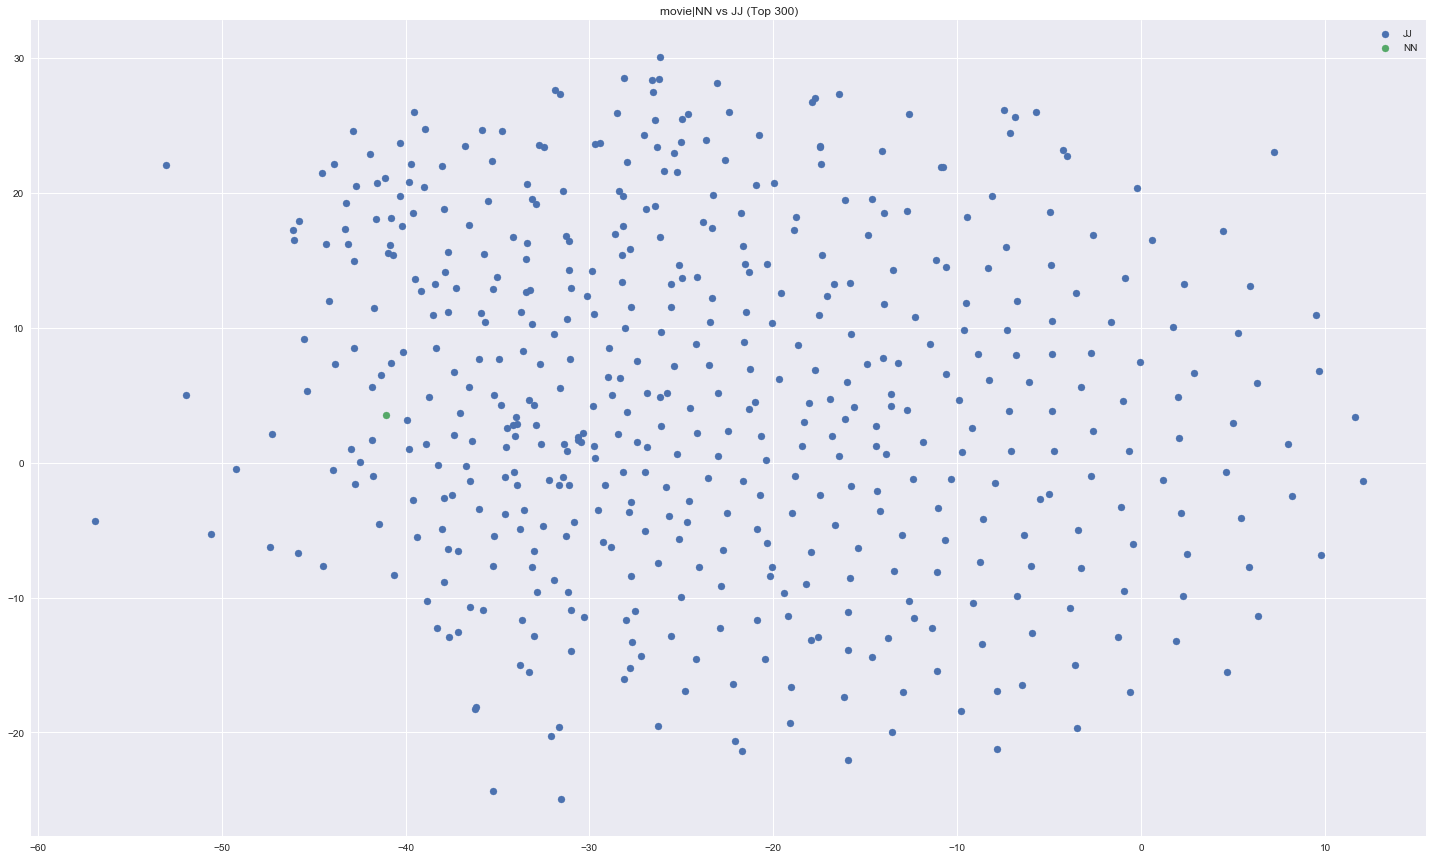

In [18]:
plotVec(df,anno=0,title="movie|NN vs JJ (Top 300)")

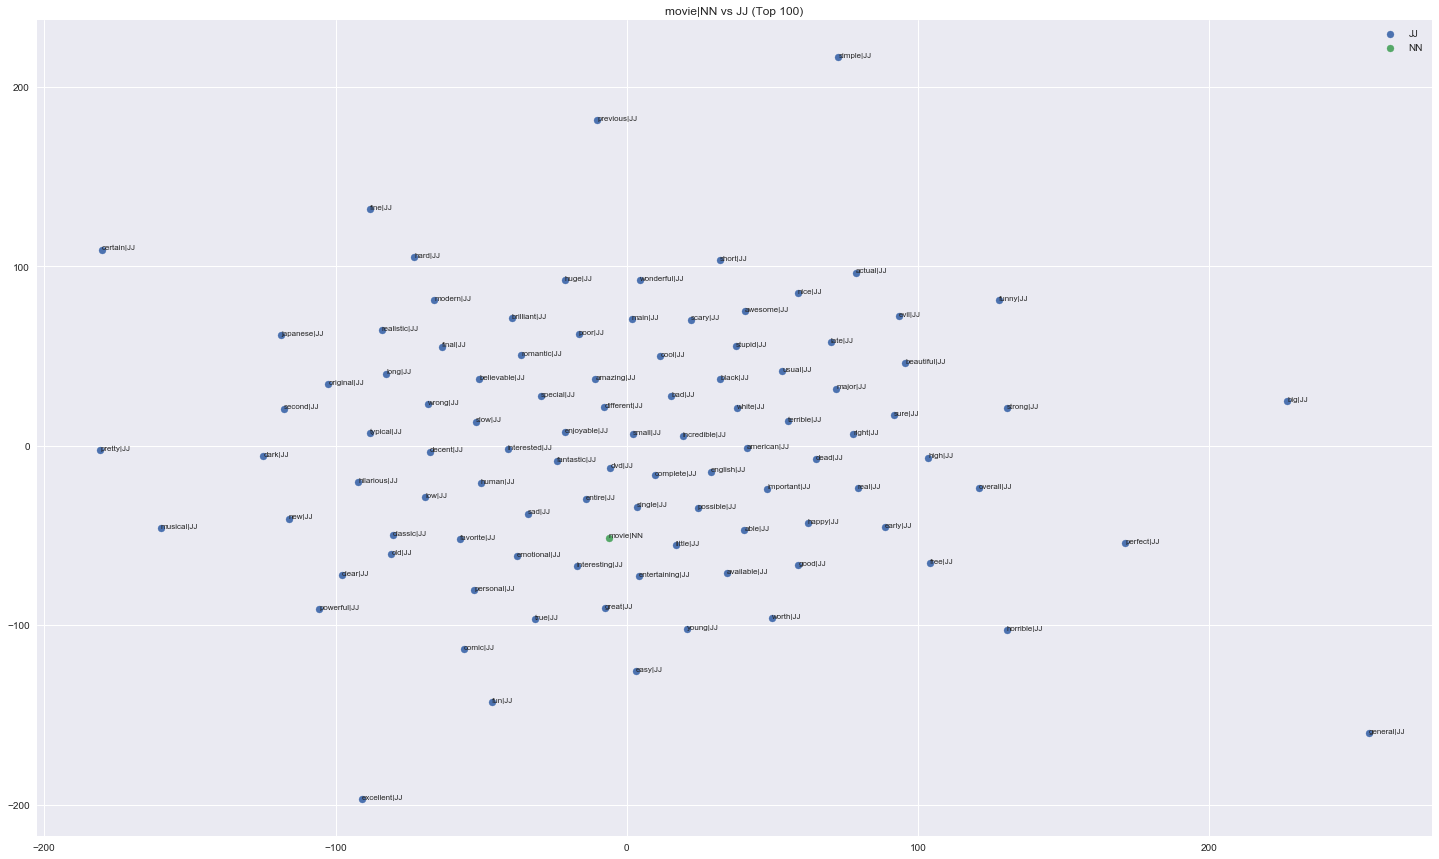

In [166]:
plotVec(df,anno=1,title="movie|NN vs JJ (Top 100)")

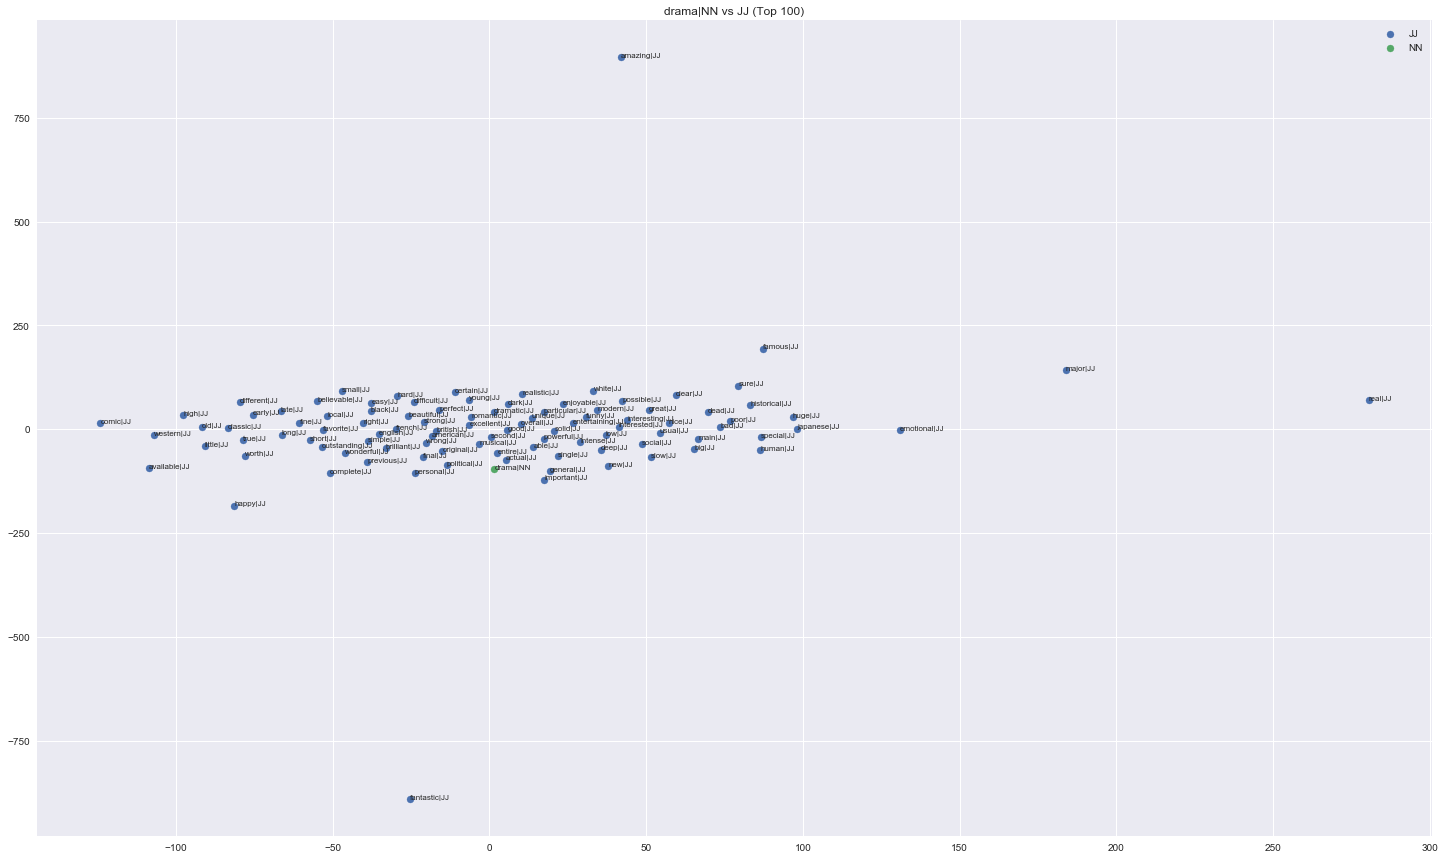

In [173]:
plotVec(df,anno=1,title="drama|NN vs JJ (Top 100)")

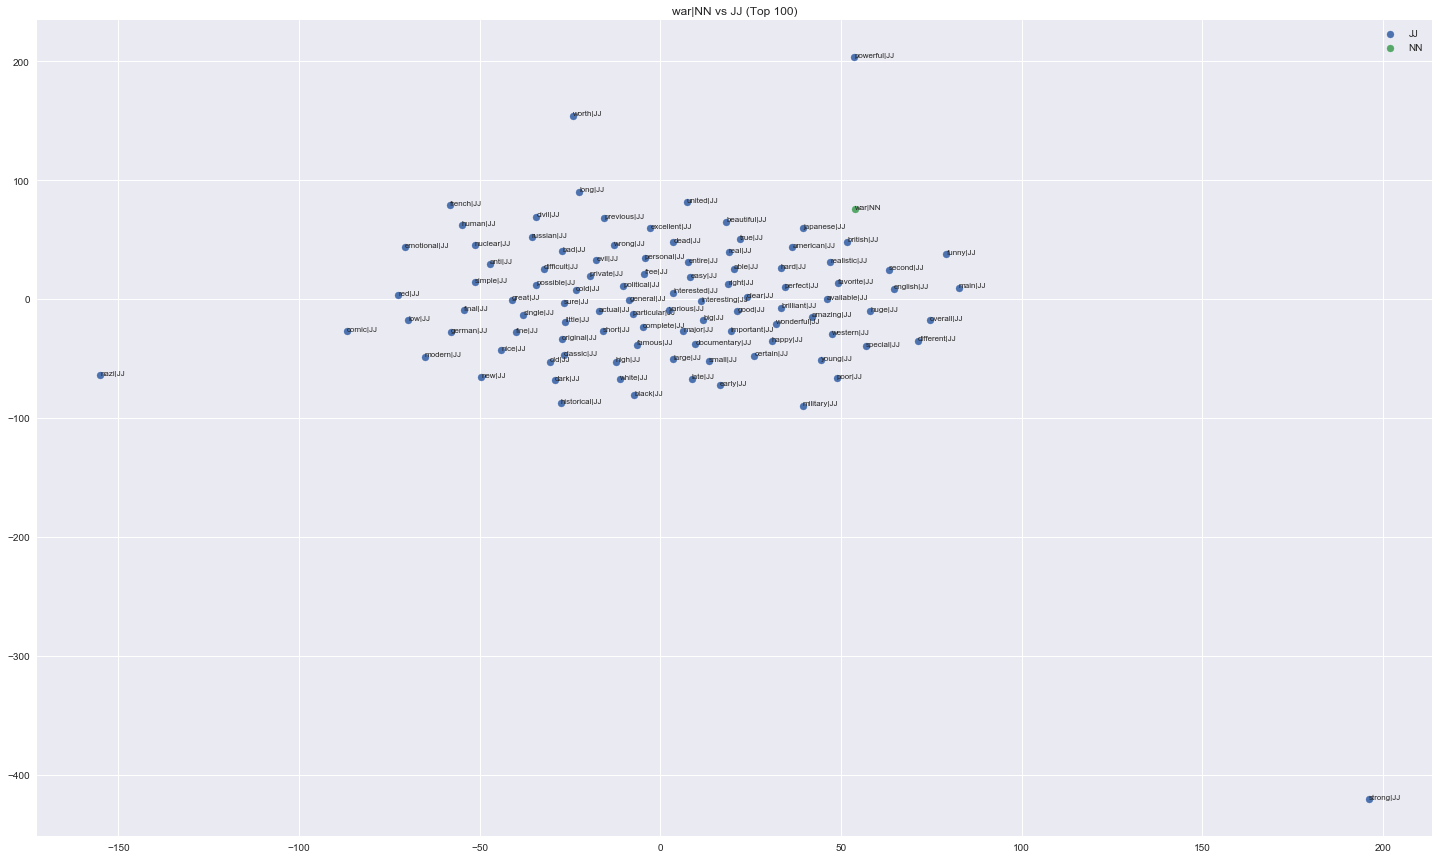

In [181]:
plotVec(df,anno=1,title="war|NN vs JJ (Top 100)")

## Polarity

/home/vivek/anaconda3/envs/vivenv/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


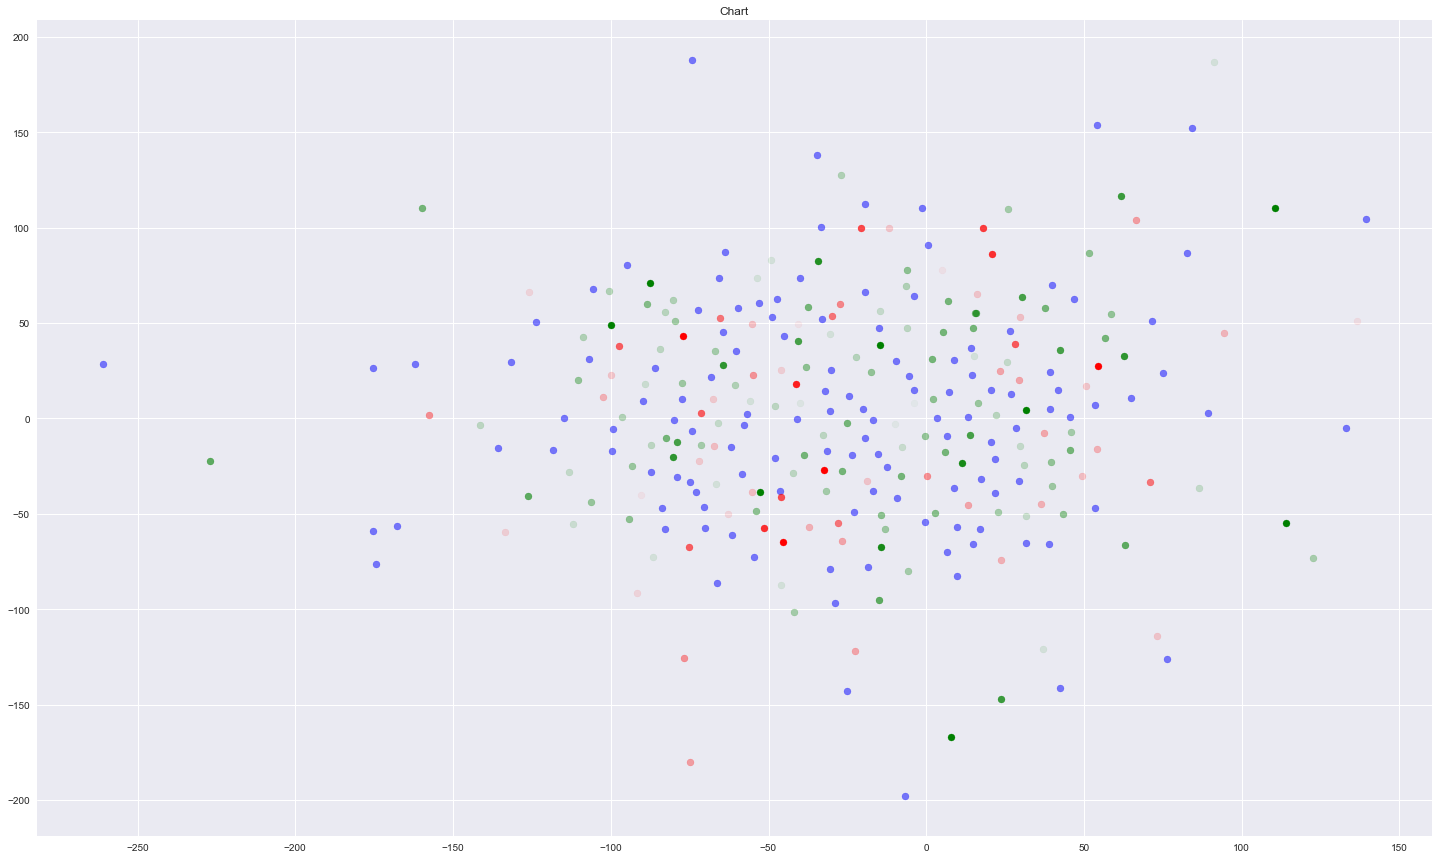

In [337]:
plotVec(df,anno=0,isPol=True)

## Polarity Plots

/home/vivek/anaconda3/envs/vivenv/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


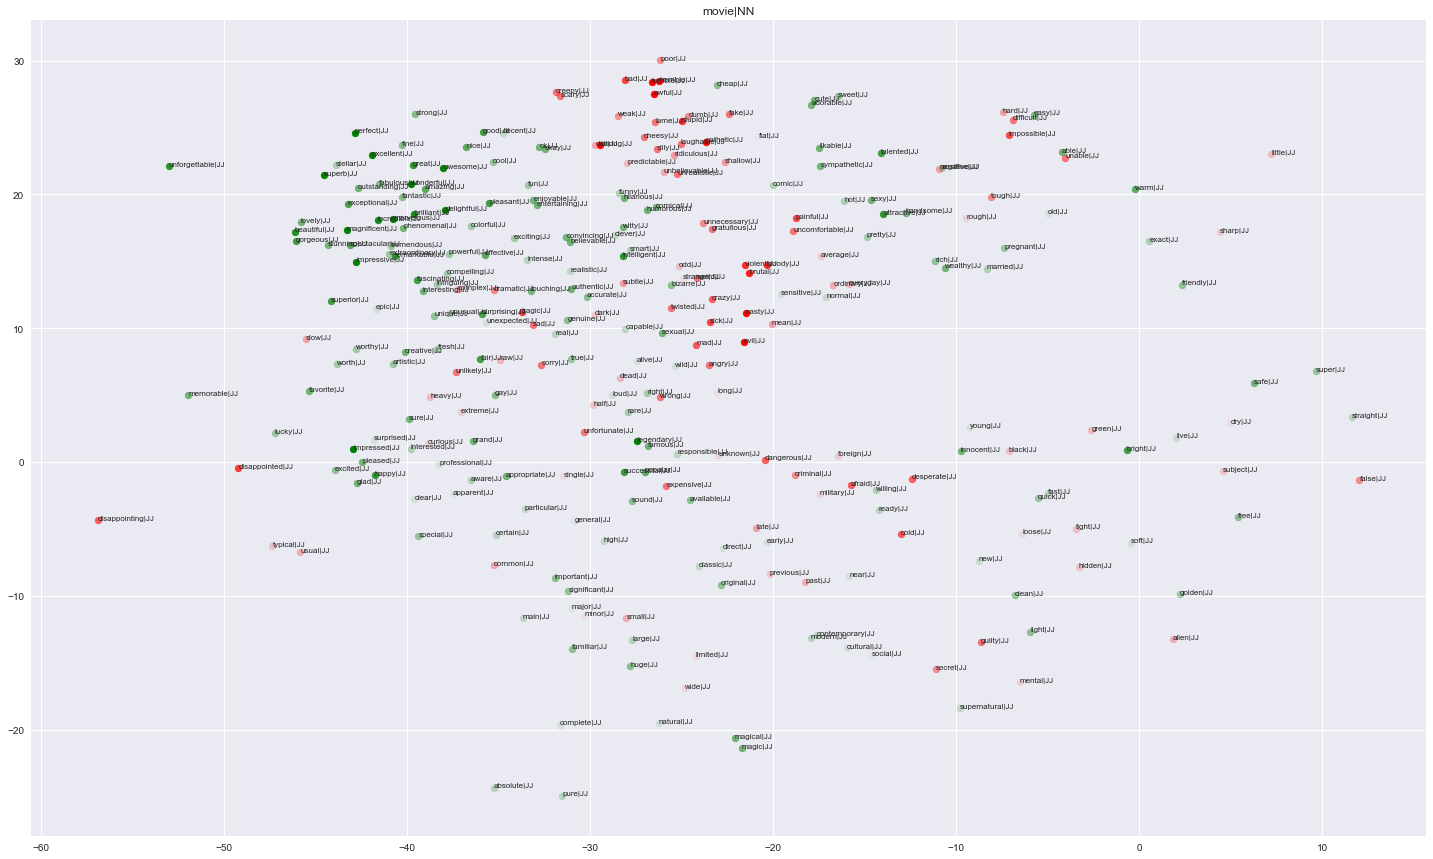

In [22]:
plotVec(df,anno=1, title="movie|NN", isPol=True)

/home/vivek/anaconda3/envs/vivenv/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


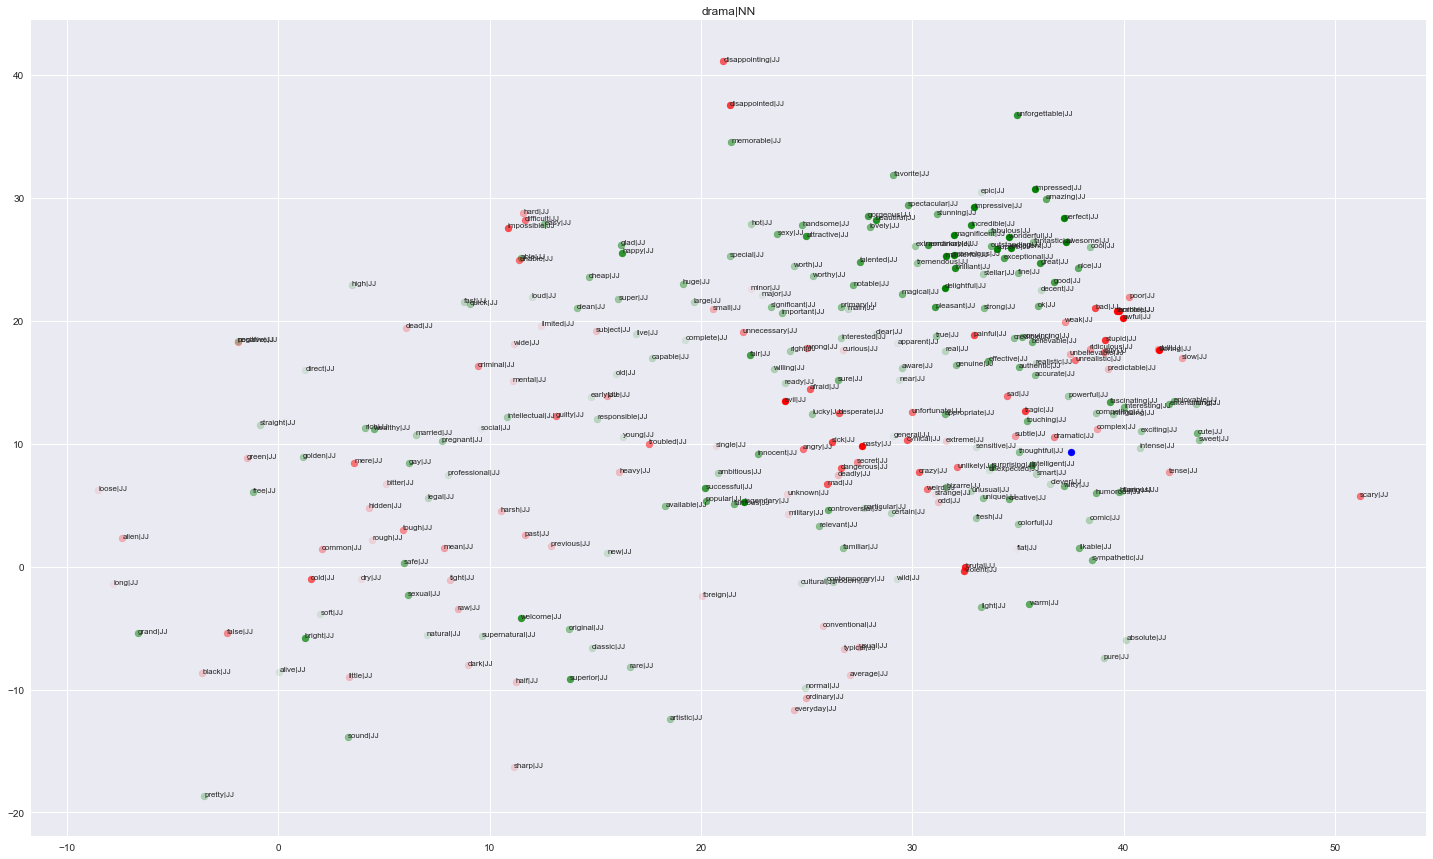

In [43]:
plotVec(df,anno=1, title="drama|NN")

/home/vivek/anaconda3/envs/vivenv/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


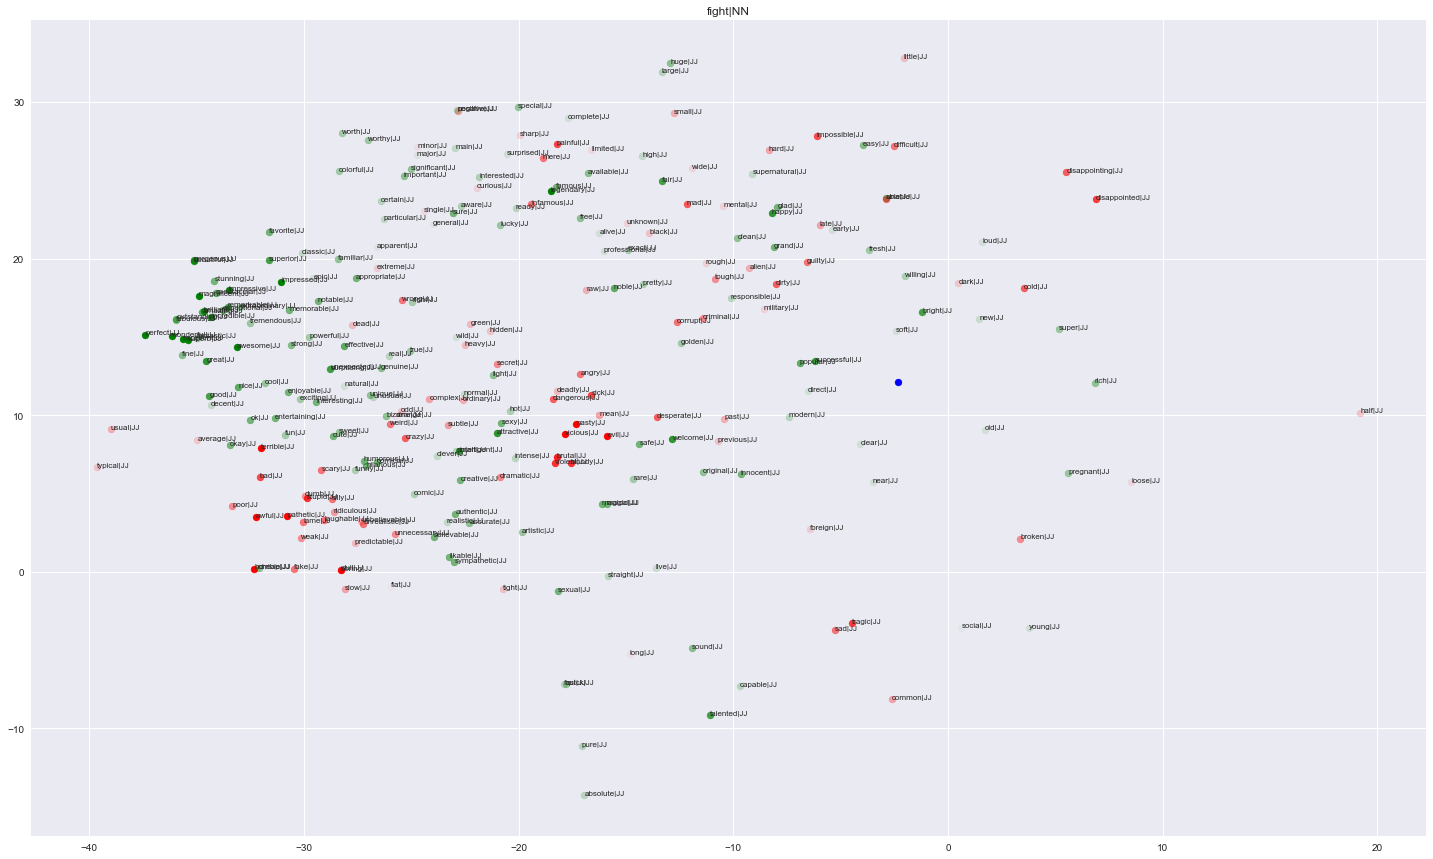

In [53]:
plotVec(df,anno=1, title="fight|NN")

/home/vivek/anaconda3/envs/vivenv/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


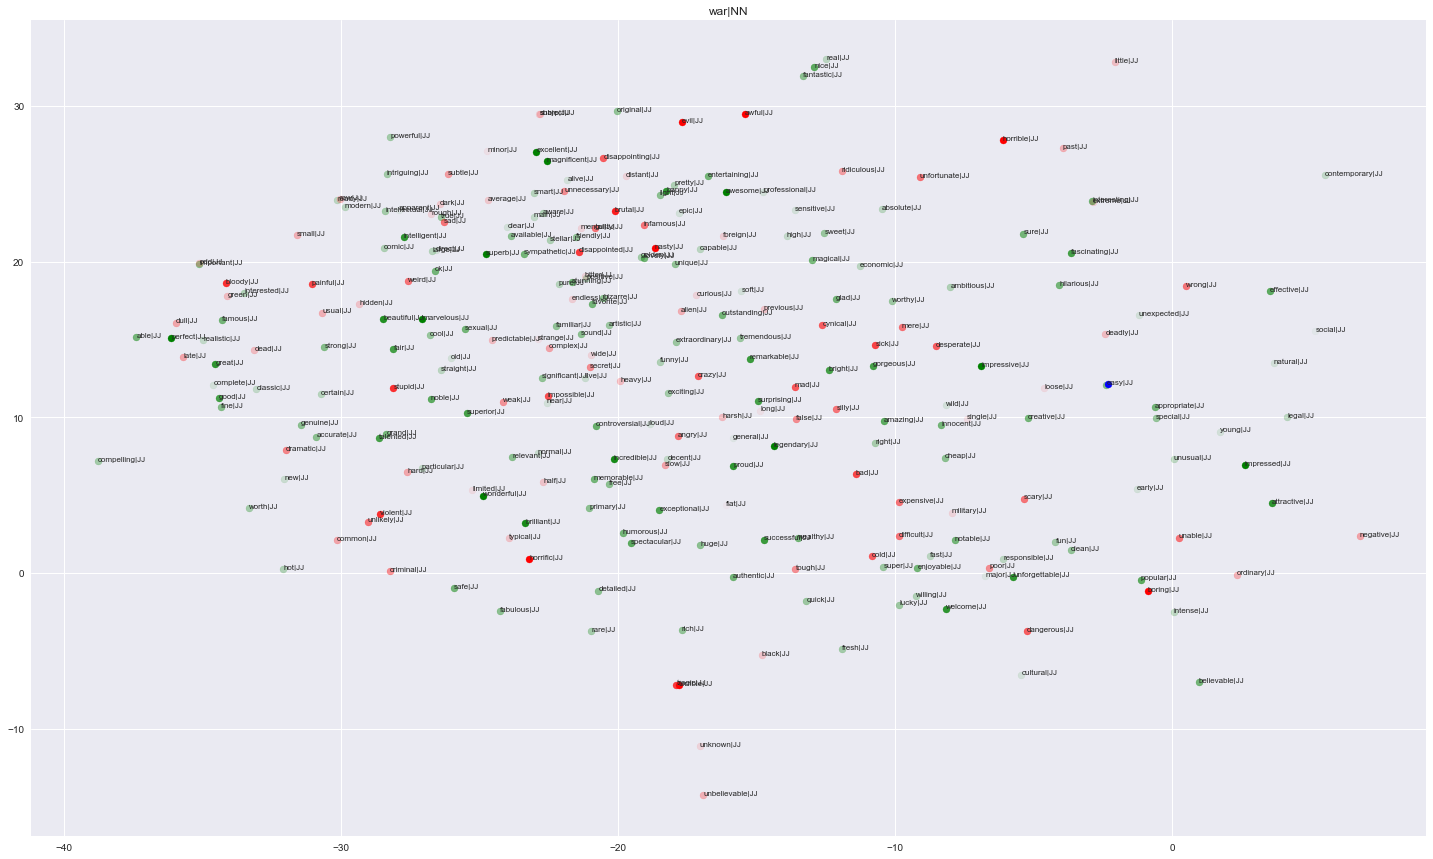

In [62]:
plotVec(df,anno=1, title="war|NN")